In [52]:
from ipynb.fs.full.task1_new import ottieniDescrittore
import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot


In [53]:
# import OS module
import os

# Get the list of all files and directories
path = "./olivetti_PNG_master/images/"
dir_list = os.listdir(path) # array di stringhe contenente i nomi dei file
 
# print("Files and directories in '", path, "' :")
 
dir_list.sort()
dir_list.remove('.DS_Store')

# prints all files
# print(dir_list)


In [54]:
# salvataggio dei descrittori dei color moments

dictionaryOfColorMomentsDescriptors = {}

for i in range(0, len(dir_list)):
    colorMomentsOfImage = ottieniDescrittore(dir_list[i], 'ColorMoments')
    dictionaryOfColorMomentsDescriptors[dir_list[i]] = colorMomentsOfImage

print(dictionaryOfColorMomentsDescriptors)

{'image-0.png': [186.03316326530611, 19.96503485319131, -0.06357393043239129], 'image-1.png': [196.45408163265307, 21.373338797012032, -0.017067535040607013], 'image-10.png': [146.39317602040816, 28.18333076413945, -0.10415465434537141], 'image-100.png': [173.1705994897959, 32.728838336098285, 0.026367138642905966], 'image-101.png': [165.7372448979592, 33.42398886298284, 0.21744163805982097], 'image-102.png': [172.25414540816325, 32.91878735864817, 0.13578794752095893], 'image-103.png': [169.82174744897958, 34.02008002103256, 0.18177427372347432], 'image-104.png': [166.04049744897958, 25.45780126385944, 0.06436824752706531], 'image-105.png': [174.890625, 31.161658491520395, 0.11963521422510114], 'image-106.png': [179.16741071428572, 29.731482560535582, -0.05467461973462245], 'image-107.png': [166.6218112244898, 26.648814658539415, -0.015094552808120852], 'image-108.png': [173.2716836734694, 32.7802047961556, 0.11813975421559367], 'image-109.png': [172.75988520408163, 31.345769269219637

In [55]:
# salvataggio dei descrittori delle HOG features

dictionaryOfHOGDescriptors = {}

for i in range(0, len(dir_list)):
    HOGofImage = ottieniDescrittore(dir_list[i], 'HOG')
    dictionaryOfHOGDescriptors[dir_list[i]] = HOGofImage

[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[0.48765299 0.48765299 0.         ... 0.08296451 0.01249152 0.03335891]
[0.38619539 0.19142615 0.01739332 ... 0.         0.00879545 0.44692699]
[0.50868362 0.05095005 0.         ... 0.         0.02111302 0.1112641 ]
[0.44612816 0.01565625 0.0039905  ... 0.00636284 0.         0.17705465]
[0.53034093 0.00551584 0.0031375  ... 0.02705097 0.         0.1218691 ]
[0.33552551 0.04466087 0.00277739 ... 0.         0.00263698 0.07612845]
[0.41252437 0.41252437 0.03329625 ... 0.01039862 0.02357552 0.2381767 ]
[0.4491679  0.0151218  0.00113448 ... 0.01261532 0.00795593 0.20697132]
[0.42333909 0.         0.         ... 0.00316426 0.01042477 0.10791101]
[0.3450686  0.03236656 0.         ... 0.00272823 0.00186862 0.04774013]
[0.19071832 0.14910788 0.0057042  ... 0.         0.         0.11261207]
[0.50732239 0.00888792 0.         ... 0.         0.01882364 0.25723451]
[0.33991866 0.08118787 0.03038516 ... 0.01362329 0.0041809  0.07

In [56]:
# salvataggio dei descrittori delle features LBP

dictionaryOfLBPDescriptors = {}

for i in range(0, len(dir_list)):
    LBPofImage = ottieniDescrittore(dir_list[i], 'LBP')
    dictionaryOfLBPDescriptors[dir_list[i]] = LBPofImage

In [57]:
dictionaryOfLBPDescriptors

{'image-0.png': array([[120,  56,  56, ..., 224, 224, 224],
        [ 60,  60,  60, ..., 227, 225, 193],
        [ 30,  28,  60, ..., 225, 227, 195],
        ...,
        [  0, 185,   0, ..., 223,  30,   0],
        [ 62,  13, 146, ..., 255,  46,   3],
        [ 14,   6, 143, ...,  13,   6, 131]], dtype=uint8),
 'image-1.png': array([[ 30,  63,  63, ..., 240, 248, 224],
        [ 62, 124,  60, ...,   0, 136, 128],
        [ 56, 124,  60, ...,  15,  15, 131],
        ...,
        [ 62,  27,  24, ...,  15, 143, 131],
        [ 30,  62,  94, ..., 255, 255, 227],
        [ 14,   4, 142, ..., 136, 136, 128]], dtype=uint8),
 'image-10.png': array([[248,  56,  56, ..., 120, 120,  96],
        [253,  60,  60, ...,  24,  48, 224],
        [253,  60,  32, ..., 222,  48, 224],
        ...,
        [ 62,  42, 209, ..., 255,   2, 227],
        [ 60,  86, 255, ..., 253,  50, 227],
        [  4, 143,  13, ..., 143,  10, 129]], dtype=uint8),
 'image-100.png': array([[  0, 208, 184, ..., 224, 224, 224]

TASK 3

In [58]:
# funzione che restituisce le k immagini più simili a quella di id imageID secondo il modelName (color moments, hog, lbp)
# parametri:
    # imageID: nome del file dell'immagine
    # k: numero di immagini simili che vogliamo ottenere
    # modelName: nome del descrittore che vogliamo calcolare

def getKsimilarImages(imageID, k, modelName):
    match modelName:
        case 'ColorMoments':
            return calculateDistanceOfColorMoments(imageID, int(k+1))
            
        case 'LBP':
            return calculateDistanceOfLBP(imageID, int(k+1))

        case 'HOG':
            return calculateDistanceOfHOG(imageID, int(k+1))

        case _:
            return "Errore, inserire un descrittore corretto"

In [59]:
def calculateDistanceOfColorMoments(imageID, k):
    colorMomentsOfInputImage = dictionaryOfColorMomentsDescriptors[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    print(colorMomentsOfImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella

    # TODO: capire se serva o no il sorted
    for (key, v) in sorted(dictionaryOfColorMomentsDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori

        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK

In [60]:
def calculateDistanceOfLBP(imageID, k):
    return


In [61]:
# la prima immagine presente nell'array in output è sempre l'immagine in input, la quale ha distanza 0 da sè stessa

def calculateDistanceOfHOG(imageID, k):
    HOGOfInputImage = dictionaryOfHOGDescriptors[imageID]
    numpyArr = np.array(HOGOfInputImage)

    print(HOGOfInputImage)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfHOGDescriptors.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)
        dictionaryOfDistances[key] = dist

    #print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = itemgetter(1))
    # Output: ['b', 'c', 'a']   

    #print(sortedDistances)

    # dict_items = sortedDistances.items()

    firstK = sortedDistances[:int(k)]

    print(firstK)

    return firstK


In [62]:
kSimilarImagesOfColorMoments = getKsimilarImages('image-0.png', 6, 'ColorMoments')

[199.8721301020408, 28.80876738707981, 0.1222815089124971]
[('image-0.png', 0.0), ('image-28.png', 3.810761222630942), ('image-249.png', 4.10401628889337), ('image-58.png', 4.415989443007275), ('image-9.png', 4.616094961286284), ('image-8.png', 4.655818088171796), ('image-227.png', 4.891436094650635)]


Nome dell'immagine:  image-0.png
Color moments dell'immagine:  [186.03316326530611, 19.96503485319131, -0.06357393043239129]
Distanza dall'immagine in input:  0.0


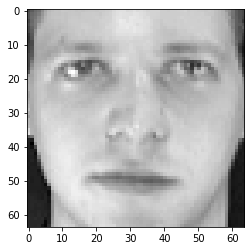

Nome dell'immagine:  image-28.png
Color moments dell'immagine:  [186.68973214285714, 23.711023767150074, 0.17805690666646318]
Distanza dall'immagine in input:  3.810761222630942


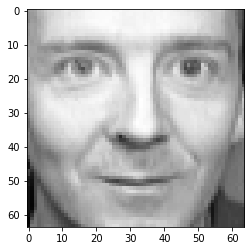

Nome dell'immagine:  image-249.png
Color moments dell'immagine:  [183.12723214285714, 22.86018971819917, 0.06523724418325909]
Distanza dall'immagine in input:  4.10401628889337


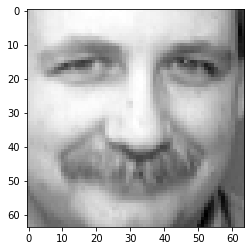

Nome dell'immagine:  image-58.png
Color moments dell'immagine:  [182.38679846938774, 22.45187318166294, 0.08002852039379274]
Distanza dall'immagine in input:  4.415989443007275


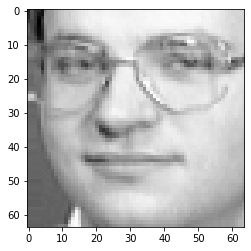

Nome dell'immagine:  image-9.png
Color moments dell'immagine:  [182.3577806122449, 22.743643982733467, 0.21789782732380528]
Distanza dall'immagine in input:  4.616094961286284


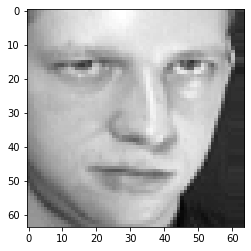

Nome dell'immagine:  image-8.png
Color moments dell'immagine:  [182.61352040816325, 23.121584683078616, -0.20097105987073205]
Distanza dall'immagine in input:  4.655818088171796


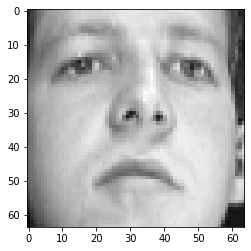

Nome dell'immagine:  image-227.png
Color moments dell'immagine:  [190.8450255102041, 20.84301944840213, -0.027910857809502497]
Distanza dall'immagine in input:  4.891436094650635


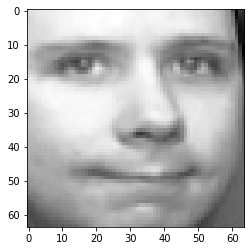

In [65]:
for i in range(0, len(kSimilarImagesOfColorMoments)):
    imageName = kSimilarImagesOfColorMoments[i][0]
    print("Nome dell'immagine: ", kSimilarImagesOfColorMoments[i][0])
    print("Color moments dell'immagine: ", dictionaryOfColorMomentsDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfColorMoments[i][1])

    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()

[0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
[('image-0.png', 0.0), ('image-7.png', 5.783940553473311), ('image-2.png', 5.956343736916993), ('image-6.png', 6.105350871706034), ('image-159.png', 6.247943878260108), ('image-152.png', 6.29368014004577), ('image-151.png', 6.502820023583562), ('image-235.png', 6.731708817018299), ('image-236.png', 6.779236069711821), ('image-178.png', 6.78678835097601), ('image-231.png', 6.831536431918492)]
Nome dell'immagine:  image-0.png
HOG features dell'immagine:  [0.50665667 0.05342124 0.         ... 0.01212533 0.00306955 0.02035037]
Distanza dall'immagine in input:  0.0


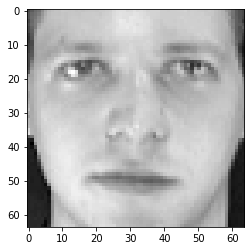

Nome dell'immagine:  image-7.png
HOG features dell'immagine:  [0.54746698 0.         0.         ... 0.00242788 0.01360166 0.15256751]
Distanza dall'immagine in input:  5.783940553473311


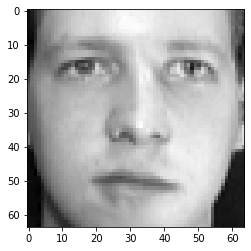

Nome dell'immagine:  image-2.png
HOG features dell'immagine:  [0.38886568 0.         0.         ... 0.00659168 0.02189671 0.03130397]
Distanza dall'immagine in input:  5.956343736916993


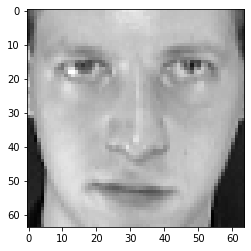

Nome dell'immagine:  image-6.png
HOG features dell'immagine:  [0.47741112 0.03733099 0.         ... 0.00219103 0.01412034 0.05430376]
Distanza dall'immagine in input:  6.105350871706034


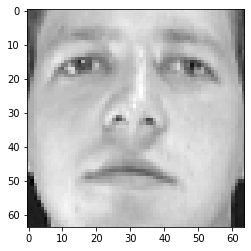

Nome dell'immagine:  image-159.png
HOG features dell'immagine:  [0.54092843 0.1143516  0.02070889 ... 0.01294059 0.02008991 0.40804863]
Distanza dall'immagine in input:  6.247943878260108


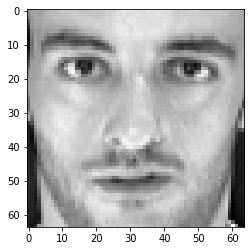

Nome dell'immagine:  image-152.png
HOG features dell'immagine:  [0.35258873 0.01126728 0.00507756 ... 0.32551169 0.2594441  0.39181965]
Distanza dall'immagine in input:  6.29368014004577


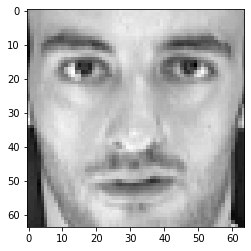

Nome dell'immagine:  image-151.png
HOG features dell'immagine:  [0.35742282 0.00224727 0.         ... 0.16081003 0.31026707 0.40963787]
Distanza dall'immagine in input:  6.502820023583562


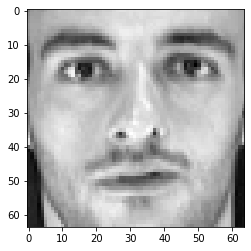

Nome dell'immagine:  image-235.png
HOG features dell'immagine:  [0.3326806  0.1754214  0.01425929 ... 0.         0.00177561 0.42672918]
Distanza dall'immagine in input:  6.731708817018299


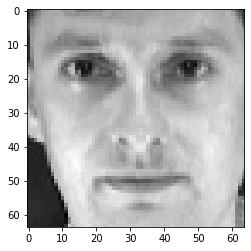

Nome dell'immagine:  image-236.png
HOG features dell'immagine:  [0.54351801 0.07996778 0.         ... 0.02263594 0.04306608 0.40779017]
Distanza dall'immagine in input:  6.779236069711821


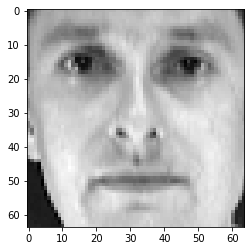

Nome dell'immagine:  image-178.png
HOG features dell'immagine:  [0.45331589 0.11850671 0.01281613 ... 0.0696742  0.06290513 0.46866721]
Distanza dall'immagine in input:  6.78678835097601


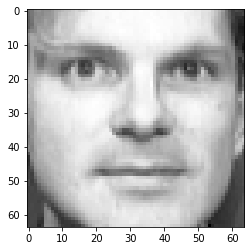

Nome dell'immagine:  image-231.png
HOG features dell'immagine:  [0.34700936 0.10678065 0.04844789 ... 0.00246001 0.01782637 0.09282159]
Distanza dall'immagine in input:  6.831536431918492


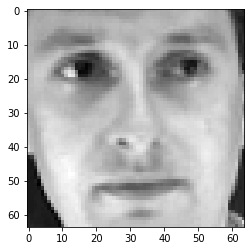

In [68]:
kSimilarImagesOfHOG = getKsimilarImages('image-0.png', 10, 'HOG')

for i in range(0, len(kSimilarImagesOfHOG)):
    print("Nome dell'immagine: ", kSimilarImagesOfHOG[i][0])
    print("HOG features dell'immagine: ", dictionaryOfHOGDescriptors[imageName])
    print("Distanza dall'immagine in input: ", kSimilarImagesOfHOG[i][1])

    imageName = kSimilarImagesOfHOG[i][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)
    # convert image to numpy array
    # data = asarray(image)

    # display the array of pixels as an image
    # il parametro cmap serve a specificare il tipo di colormap che vogliamo utilizzare, per questo motivo abbiamo specificato gray per la scala di grigi
    pyplot.imshow(image, cmap='gray')
    pyplot.show()